In [1]:
import numpy as np
import matplotlib.pyplot as plt
#Gudonov
ul=1; ur=-1/2; N=160
dx=2/N #max |f'(u)|=max |u|=1
dt=dx 
T=4; nt=int(T/dt)
U=np.ones([nt,N]); U[0,:N//2]=ul; U[0,N//2:]=ur;f=np.zeros([N+1])
for i in range(1,nt):
    for j in range(1,N):
        if U[i-1,j-1]<U[i-1,j]:# solve min problem
            if U[i-1,j-1]*U[i-1,j]>=0: #same sign
                f[j]=np.min([U[i-1,j-1]**2/2,U[i-1,j]**2/2])
            else:
                f[j]=0 #opposite sign, min at zero
        else: #solve max problem
            f[j]=np.max([U[i-1,j-1]**2/2,U[i-1,j]**2/2])
    f[0]=U[i-1,0]**2/2
    f[-1]=U[i-1,-1]**2/2
    #update
    U[i]=U[i-1]-dt/dx*(f[1:]-f[:-1])
#Lax-Friedrich
alpha=1 #max |f'(u)|=max |u|=1
dt=dx/2 #make sure its monotone 
T=4; nt=int(T/dt)
U_lax=np.ones([nt,N]); U_lax[0,:N//2]=ul; U_lax[0,N//2:]=ur;f_lax=np.zeros([N+1])
for i in range(1,nt):
    for j in range(1,N):
        f_lax[j]=(U_lax[i-1,j]**2/2+U_lax[i-1,j-1]**2/2-(U_lax[i-1,j]-U_lax[i-1,j-1]))/2
    f_lax[0]=U_lax[i-1,0]**2/2
    f_lax[-1]=U_lax[i-1,-1]**2/2
    #update
    U_lax[i]=U_lax[i-1]-dt/dx*(f_lax[1:]-f_lax[:-1])
#Analytic Solution    
U_anal=np.ones([nt,N]); U_anal[0,:N//2]=ul; U_anal[0,N//2:]=ur;
#shock speed=(1/2-1/8)/(1+1/2)=1/4
for i in range(1,nt):
    for j in range(N):
        x=-1+dx*(j+1/2)
        t=i*dt
        if (x<t/4):
            U_anal[i,j]=ul
        else:
            U_anal[i,j]=ur

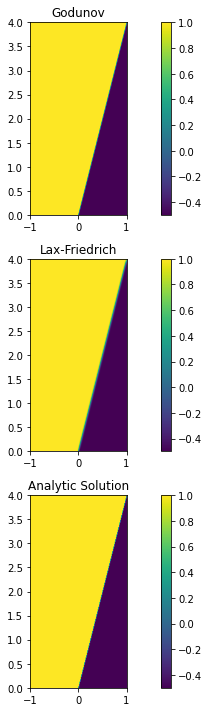

In [2]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, figsize=(10,10))

f1=ax1.imshow(np.flip(U,axis=0), extent=[-1,1,0,4])
ax1.set_title('Godunov')
fig.colorbar(f1,ax=ax1)
f2=ax2.imshow(np.flip(U_lax,axis=0), extent=[-1,1,0,4])
ax2.set_title('Lax-Friedrich')
fig.colorbar(f2,ax=ax2)
f3=ax3.imshow(np.flip(U_anal,axis=0), extent=[-1,1,0,4])
ax3.set_title('Analytic Solution')
fig.colorbar(f3,ax=ax3)
plt.tight_layout()
plt.show()